In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import keras
import random
import io
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Songs.csv")
data.head()

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...


In [ ]:
print("Artists in the data:\n",data.Artist.value_counts())

Artists in the data:
 Taylor Swift          50
David Bowie           50
Billy Joel            50
Eric Clapton          50
Billie Eilish         50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
Ray LaMontagne        30
Elton John            30
Queen                 30
Frank Sinatra         30
John Denver           30
Bryan Adams           30
​twenty one pilots    30
Nat King Cole         30
Lana Del Rey          30
Vance Joy             30
George Michael        30
Bob Dylan             20
Ed Sheeran            20
Name: Artist, dtype: int64


In [ ]:
print("Size of Dataset:",data.shape)

Size of Dataset: (745, 3)


In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data["No_of_Characters"] = data["Lyrics"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Lyrics"]), axis=1).apply(len)
data["No_of_Lines"] = data["Lyrics"].str.split('\n').apply(len)
data.describe()

,No_of_Characters,No_of_Words,No_of_Lines
count,745.000000,745.000000,745.000000
mean,1403.347651,319.400000,46.277852
std,666.721467,156.163646,21.180531
min,1.000000,1.000000,1.000000
25%,946.000000,215.000000,33.000000
50%,1289.000000,291.000000,44.000000
75%,1714.000000,389.000000,56.000000
max,7267.000000,1652.000000,224.000000


<Figure size 1500x1500 with 0 Axes>

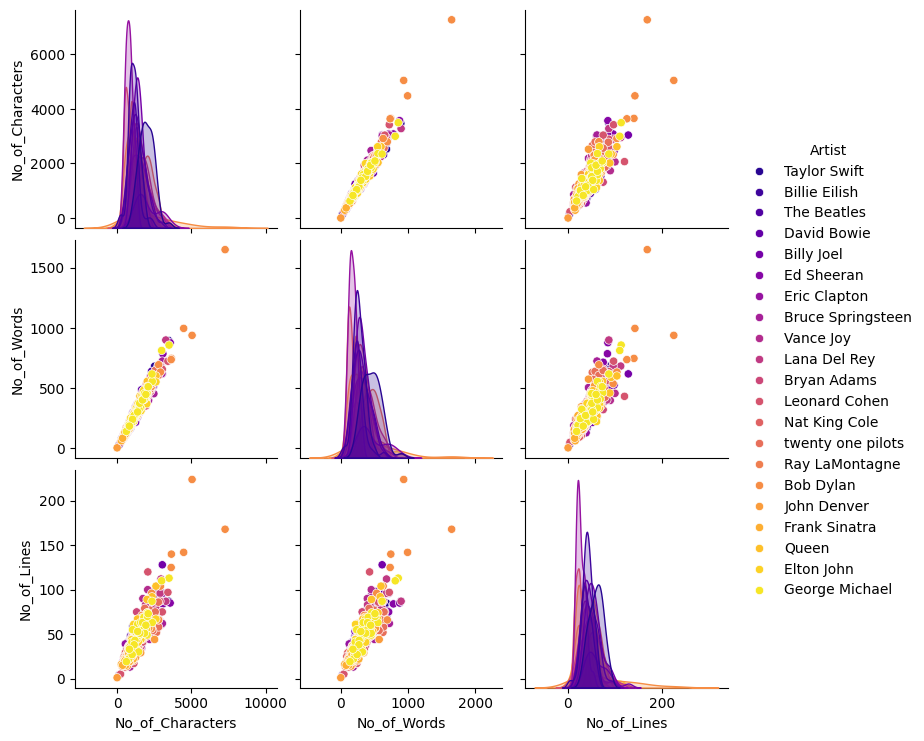

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="Artist", palette="plasma")

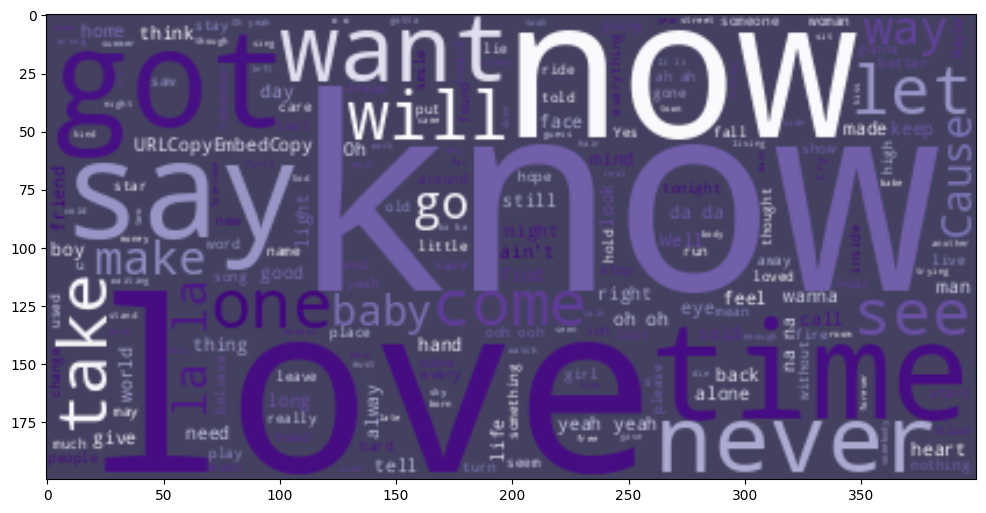

In [ ]:

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [ ]:
def display_lyrics(song_lyrics):
    print(song_lyrics)


def My_song(song_lyrics):
    display_lyrics(song_lyrics)

My_song(data.Lyrics[42][:500])

Keep your helmet, keep your life, son
Just a flesh wound, here's your rifle
Crawling up the beaches now
"Sir, I think he's bleeding out"
And some things you just can't speak about

With you I serve, with you I fall down, down
Watch you breathe in, watch you breathing out, out

Something med school did not cover
Someone's daughter, someone's mother
Holds your hand through plastic now
"Doc, I think she's crashing out"
And some things you just can't speak about

Only twenty minutes to sleep
But you


In [ ]:
Corpus =''
for listitem in data.Lyrics:
    Corpus += listitem

Corpus = Corpus.lower()
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 92


In [ ]:

print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ', 'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', '…', '\u205f', '\ufeff']


In [ ]:
to_remove = ['{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ',
             'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”',
             '…', '\u205f', '\ufeff', '!', '&', '(', ')', '*', '-',  '/', ]
for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")


In [ ]:
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '"', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus)
L_symb = len(symb)


mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1045494
Number of unique characters: 47


In [ ]:
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])


L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 1045454


In [ ]:
from keras.utils import to_categorical

In [ ]:

X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)
Y = to_categorical(targets)

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(Y.shape[1], activation='softmax'))
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 47)                12079     
                                                                 
Total params: 276271 (1.05 MB)
Trainable params: 276271 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Training the Model
history = model.fit(X, Y, batch_size=128, epochs=10)

Epoch 1/10
8168/8168 [==============================] - 2018s 247ms/step - loss: 2.5693
Epoch 2/10
8168/8168 [==============================] - 2020s 247ms/step - loss: 2.2327
Epoch 3/10
8168/8168 [==============================] - 2036s 249ms/step - loss: 2.0748
Epoch 4/10
8168/8168 [==============================] - 2045s 250ms/step - loss: 1.9784
Epoch 5/10
8168/8168 [==============================] - 2060s 252ms/step - loss: 1.9044
Epoch 6/10
8168/8168 [==============================] - 2051s 251ms/step - loss: 1.8473
Epoch 7/10
8168/8168 [==============================] - 2052s 251ms/step - loss: 1.8012
Epoch 8/10
8168/8168 [==============================] - 2049s 251ms/step - loss: 1.7712
Epoch 9/10
8168/8168 [==============================] - 2107s 258ms/step - loss: 1.7463
Epoch 10/10
8168/8168 [==============================] - 2120s 260ms/step - loss: 1.7172


[Text(0.5, 0, 'Epochs')]

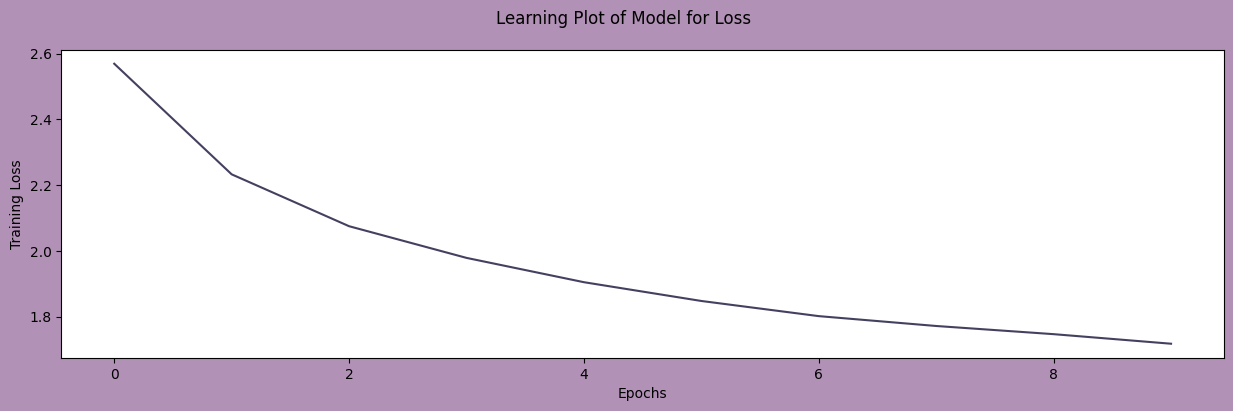

In [ ]:
history_df = pd.DataFrame(history.history)


fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [ ]:

def Lyrics_Generator(starter,Ch_count):
    generated= ""
    starter = starter
    seed=[mapping[char] for char in starter]
    generated += starter

    for i in range(Ch_count):
        seed=[mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]

        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]

        generated += next_char
        starter = starter[1:] + next_char

    return generated

In [ ]:

song_1= Lyrics_Generator("i'm a sunflower, a little funny", 400)
My_song(song_1)

i'm a sunflower, a little funny and soeet
to the bert of toee
in the seade of toee
in the sore of toee
in the seade of toee
in the sore of toee
in the seade of toee
in the sore of toee
in the seade of toee
in the sore of toee
in the seade of toee
in the sore of toee
in the seade of toee
in the sore of toee
in the seade of toee
in the sore of toee
in the seade of toee
in the sore of toee
in the seade of toee
in the sore of toee



In [3]:
def display_lyrics(song_lyrics):
    print(song_lyrics)


def My_song(song_lyrics):
    display_lyrics(song_lyrics)

My_song(data.Lyrics[42][:500])

Keep your helmet, keep your life, son
Just a flesh wound, here's your rifle
Crawling up the beaches now
"Sir, I think he's bleeding out"
And some things you just can't speak about

With you I serve, with you I fall down, down
Watch you breathe in, watch you breathing out, out

Something med school did not cover
Someone's daughter, someone's mother
Holds your hand through plastic now
"Doc, I think she's crashing out"
And some things you just can't speak about

Only twenty minutes to sleep
But you
